## Importing Libreres

In [1]:
%pylab
import pandas as pd
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import *

import warnings 
warnings.filterwarnings('ignore')
import os
%matplotlib inline

Using matplotlib backend: <object object at 0x7fbcbab74450>
Populating the interactive namespace from numpy and matplotlib


## Data loading

In [2]:
# reading my data
clients = pd.read_csv("Clients.csv")
display(clients)
stays = pd.read_csv("Stays.csv")
display(stays)

,uid,dob,household_size,gender,race,ethnicity,veteran,type,income,health_ins,disabling_cond
0,1726b464,1950-03-14,1,Male,Multiracial/Other,Non-Hispanic/Non-Latino,No,Individual,NaN,NaN,NaN
1,0b8fce0c,1960-03-03,1,Male,White,Non-Hispanic/Non-Latino,No,Individual,0.0,No,Yes
2,147dbf1e,1987-06-01,4,Female,Black,Non-Hispanic/Non-Latino,No,Family,835.0,Yes,Yes
3,4dea1ce3,1967-01-06,5,Female,Black,Non-Hispanic/Non-Latino,No,Family,2028.0,No,No
4,a94d5af3,1983-11-18,6,Female,Black,Non-Hispanic/Non-Latino,No,Family,954.0,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
1352,71b0c8a2,1991-12-26,4,Female,Black,Non-Hispanic/Non-Latino,No,Family,150.0,Yes,Yes
1353,e96e03cf,2000-06-12,2,Female,Black,Non-Hispanic/Non-Latino,No,Family,140.0,No,No
1354,fecfec0b,1974-05-13,1,Male,Black,Non-Hispanic/Non-Latino,No,Individual,NaN,NaN,No
1355,00a24e0e,1998-07-08,2,Female,Black,Non-Hispanic/Non-Latino,No,Family,0.0,Yes,No


,uid,shelter,start,end
0,1726b464,Singles Shelter B,2015-12-18,2016-04-08
1,0b8fce0c,Singles Shelter A,2015-10-29,2015-11-20
2,147dbf1e,Family Shelter G,2018-12-10,2019-07-08
3,4dea1ce3,Family Shelter H,2019-07-19,NaN
4,a94d5af3,Family Shelter C,2017-08-17,2018-07-20
...,...,...,...,...
1805,e96e03cf,Family Shelter H,2019-02-26,NaN
1806,fecfec0b,Singles Shelter B,2016-01-20,2016-01-21
1807,fecfec0b,Singles Shelter A,2015-10-31,2015-11-02
1808,00a24e0e,Family Shelter H,2019-05-06,2019-07-16


In [3]:
#Printing out a few columns clients data
clients.head()

,uid,dob,household_size,gender,race,ethnicity,veteran,type,income,health_ins,disabling_cond
0,1726b464,1950-03-14,1,Male,Multiracial/Other,Non-Hispanic/Non-Latino,No,Individual,NaN,NaN,NaN
1,0b8fce0c,1960-03-03,1,Male,White,Non-Hispanic/Non-Latino,No,Individual,0.0,No,Yes
2,147dbf1e,1987-06-01,4,Female,Black,Non-Hispanic/Non-Latino,No,Family,835.0,Yes,Yes
3,4dea1ce3,1967-01-06,5,Female,Black,Non-Hispanic/Non-Latino,No,Family,2028.0,No,No
4,a94d5af3,1983-11-18,6,Female,Black,Non-Hispanic/Non-Latino,No,Family,954.0,Yes,No


In [4]:
#Check the dimensions of the clients data
clients.shape

(1357, 11)

## Expoloratory Data Analysis (EDA)

In [5]:
# view of descriptive statistics of the data
clients.describe()

,household_size,income
count,1357.000000,833.000000
mean,2.143699,725.832197
std,1.533062,705.104888
min,1.000000,0.000000
25%,1.000000,274.000000
50%,1.000000,575.000000
75%,3.000000,1003.000000
max,11.000000,6860.800000


In [6]:
#Check how many null values and data type in each variable.
clients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1357 entries, 0 to 1356
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   uid             1357 non-null   object 
 1   dob             1357 non-null   object 
 2   household_size  1357 non-null   int64  
 3   gender          1356 non-null   object 
 4   race            1333 non-null   object 
 5   ethnicity       1332 non-null   object 
 6   veteran         1331 non-null   object 
 7   type            1357 non-null   object 
 8   income          833 non-null    float64
 9   health_ins      1215 non-null   object 
 10  disabling_cond  1298 non-null   object 
dtypes: float64(1), int64(1), object(9)
memory usage: 116.7+ KB


* We can see that we have two numerical variables and the rest are object type. 

* 'dob' column is an object type (We will convert it to datetime type later)

In [7]:
#extract the columns
cols = clients.columns

In [8]:
cols

Index(['uid', 'dob', 'household_size', 'gender', 'race', 'ethnicity',
       'veteran', 'type', 'income', 'health_ins', 'disabling_cond'],
      dtype='object')

In [9]:
#extract the numirical columns
num_data = clients._get_numeric_data().columns

In [10]:
num_data

Index(['household_size', 'income'], dtype='object')

In [11]:
#extract the catigorical columns
cat_data = list(set(cols) - set(num_data))

In [12]:
cat_data

['health_ins',
 'veteran',
 'disabling_cond',
 'uid',
 'type',
 'dob',
 'race',
 'ethnicity',
 'gender']

In [13]:
# Checking for null values
clients.isnull().sum()

uid                 0
dob                 0
household_size      0
gender              1
race               24
ethnicity          25
veteran            26
type                0
income            524
health_ins        142
disabling_cond     59
dtype: int64

In [14]:
clients.isnull().values.any()

True

### Visualizing Outliers

In [15]:
# Function to create diagnostic plots
def plot_var(df, var):
    plt.figure(figsize(15,5))
    
    # histogram
    plt.subplot(1,2,1)
    sns.histplot(df[var], bins=15, kde=True)
    
    # boxplot
    plt.subplot(1,2,2)
    sns.boxplot(x = df[var])
    plt.show()
    

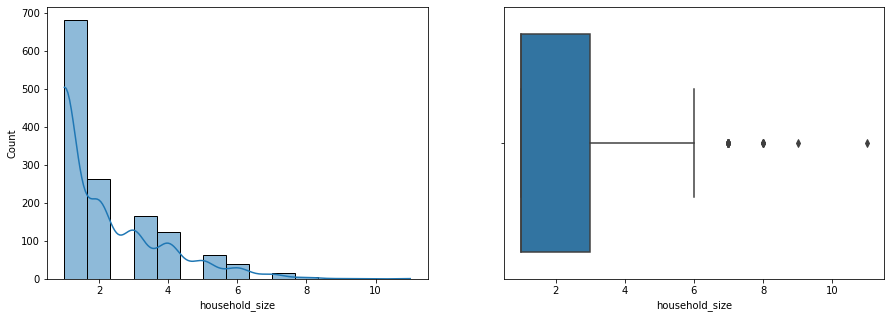

In [16]:
plot_var(clients, 'household_size')

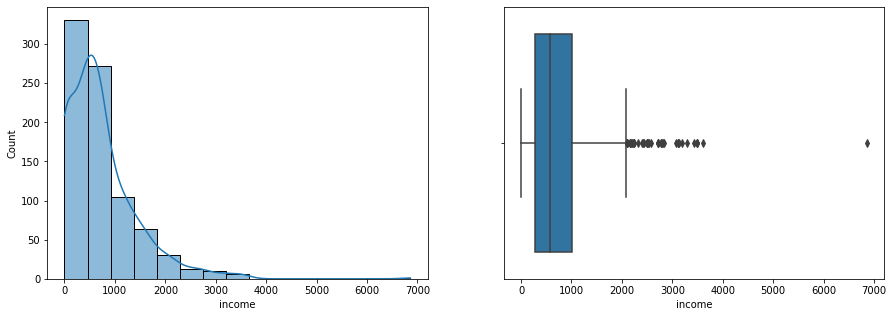

In [17]:
plot_var(clients,'income')

As we can see here that both **'incom'** and **'household_size'** columns have outliers, we will deal with them later.

### Distribution of Categorical Variables

In [18]:
#Checking the distribution of the 'race' column
count_races = clients['race'].value_counts()

In [19]:
count_races

Black                1230
White                  63
Multiracial/Other      27
American Indian         8
Asian                   5
Name: race, dtype: int64

Text(0, 0.5, 'Frequency')

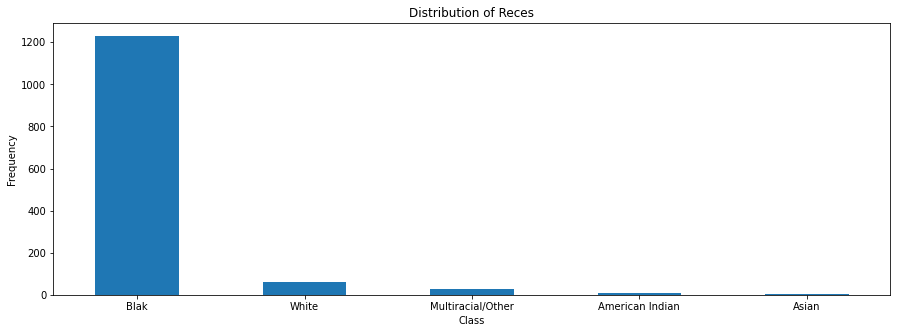

In [20]:
LABELS = ['Blak', 'White', 'Multiracial/Other', 'American Indian', 'Asian' ]

count_races.plot(kind = 'bar', rot=0)
plt.title("Distribution of Reces")
plt.xticks(range(5), LABELS)
plt.xlabel("Class")
plt.ylabel("Frequency")

In [21]:
#Checking the distribution of the 'ethnicity' column
count_ethnicities = clients['ethnicity'].value_counts()

In [22]:
count_ethnicities

Non-Hispanic/Non-Latino    1267
Hispanic/Latino              65
Name: ethnicity, dtype: int64

Text(0, 0.5, 'Frequency')

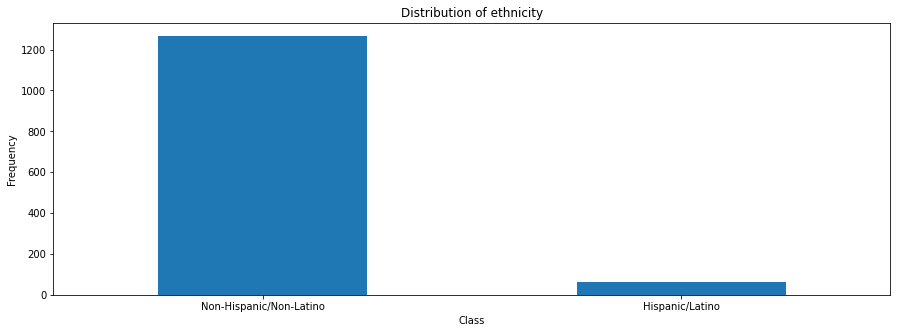

In [23]:
LABELS = ['Non-Hispanic/Non-Latino', 'Hispanic/Latino']

count_ethnicities.plot(kind = 'bar', rot=0)
plt.title("Distribution of ethnicity")
plt.xticks(range(2), LABELS)
plt.xlabel("Class")
plt.ylabel("Frequency")

In [24]:
#Checking the distribution of the 'veteran' column
count_veterans = clients['veteran'].value_counts()

In [25]:
count_veterans

No     1266
Yes      65
Name: veteran, dtype: int64

Text(0, 0.5, 'Frequency')

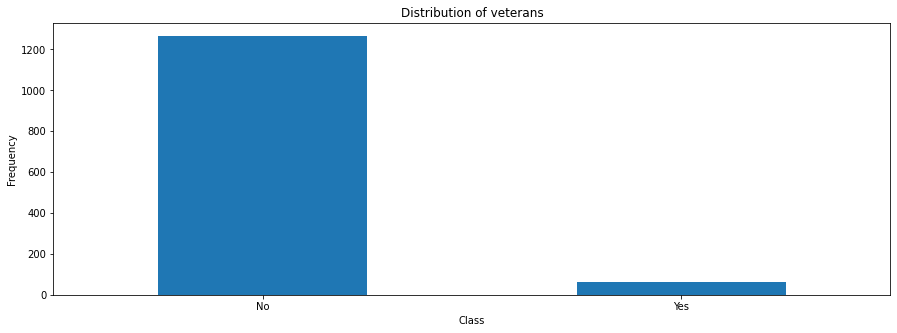

In [26]:
LABELS = ['No', 'Yes']

count_veterans.plot(kind = 'bar', rot=0)
plt.title("Distribution of veterans")
plt.xticks(range(2), LABELS)
plt.xlabel("Class")
plt.ylabel("Frequency")

In [27]:
#Checking the distribution of the 'health_ins' column
count_health_ins = clients['health_ins'].value_counts()

In [28]:
count_health_ins

Yes    951
No     264
Name: health_ins, dtype: int64

Text(0, 0.5, 'Frequency')

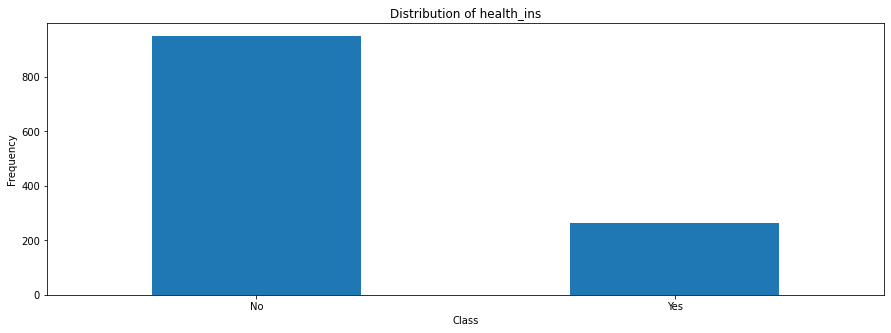

In [29]:
LABELS = ['No', 'Yes']

count_health_ins.plot(kind = 'bar', rot=0)
plt.title("Distribution of health_ins")
plt.xticks(range(2), LABELS)
plt.xlabel("Class")
plt.ylabel("Frequency")

In [30]:
#Checking the distribution of the 'ethnicity' column
count_disabling_cond = clients['disabling_cond'].value_counts()

In [31]:
count_disabling_cond

No     760
Yes    538
Name: disabling_cond, dtype: int64

Text(0, 0.5, 'Frequency')

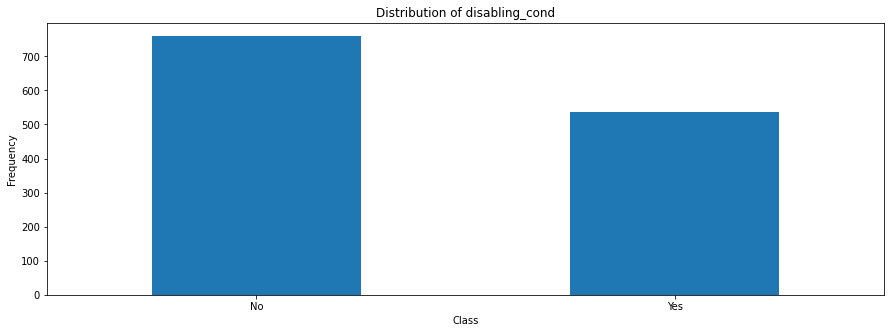

In [32]:
LABELS = ['No', 'Yes']

count_disabling_cond.plot(kind = 'bar', rot=0)
plt.title("Distribution of disabling_cond")
plt.xticks(range(2), LABELS)
plt.xlabel("Class")
plt.ylabel("Frequency")

In [33]:
#Checking the distribution of the 'type' column
count_types = clients['type'].value_counts()

In [34]:
count_types

Individual    681
Family        676
Name: type, dtype: int64

Text(0, 0.5, 'Frequency')

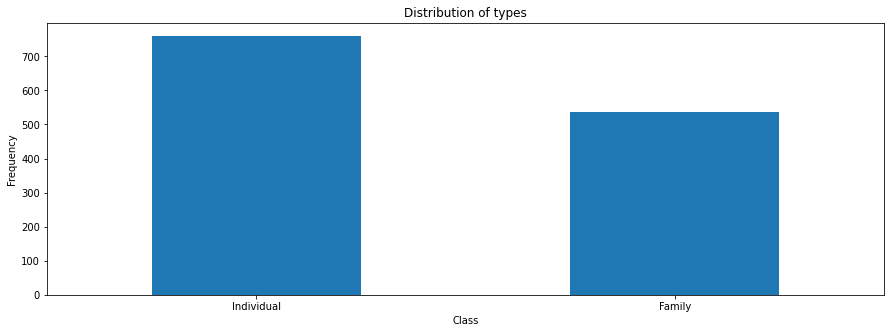

In [35]:
LABELS = ['Individual', 'Family']

count_disabling_cond.plot(kind = 'bar', rot=0)
plt.title("Distribution of types")
plt.xticks(range(2), LABELS)
plt.xlabel("Class")
plt.ylabel("Frequency")

### Data Cleaning

In [36]:
clients.head()

,uid,dob,household_size,gender,race,ethnicity,veteran,type,income,health_ins,disabling_cond
0,1726b464,1950-03-14,1,Male,Multiracial/Other,Non-Hispanic/Non-Latino,No,Individual,NaN,NaN,NaN
1,0b8fce0c,1960-03-03,1,Male,White,Non-Hispanic/Non-Latino,No,Individual,0.0,No,Yes
2,147dbf1e,1987-06-01,4,Female,Black,Non-Hispanic/Non-Latino,No,Family,835.0,Yes,Yes
3,4dea1ce3,1967-01-06,5,Female,Black,Non-Hispanic/Non-Latino,No,Family,2028.0,No,No
4,a94d5af3,1983-11-18,6,Female,Black,Non-Hispanic/Non-Latino,No,Family,954.0,Yes,No


In [37]:
clients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1357 entries, 0 to 1356
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   uid             1357 non-null   object 
 1   dob             1357 non-null   object 
 2   household_size  1357 non-null   int64  
 3   gender          1356 non-null   object 
 4   race            1333 non-null   object 
 5   ethnicity       1332 non-null   object 
 6   veteran         1331 non-null   object 
 7   type            1357 non-null   object 
 8   income          833 non-null    float64
 9   health_ins      1215 non-null   object 
 10  disabling_cond  1298 non-null   object 
dtypes: float64(1), int64(1), object(9)
memory usage: 116.7+ KB


In [38]:
#Let's convert the 'dob' column to datetime format
clients['dob']= pd.to_datetime(clients['dob'])

In [39]:
clients['dob'].dtype

dtype('<M8[ns]')

In [40]:
clients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1357 entries, 0 to 1356
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   uid             1357 non-null   object        
 1   dob             1357 non-null   datetime64[ns]
 2   household_size  1357 non-null   int64         
 3   gender          1356 non-null   object        
 4   race            1333 non-null   object        
 5   ethnicity       1332 non-null   object        
 6   veteran         1331 non-null   object        
 7   type            1357 non-null   object        
 8   income          833 non-null    float64       
 9   health_ins      1215 non-null   object        
 10  disabling_cond  1298 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(8)
memory usage: 116.7+ KB


### <u>Detecting outlier using InterQuartile Range</u>

**Steps**
1. Arrange the data in increasing order
2. Calculate first(Q1) and third quartile(Q3)
3. Find interquartile range (Q3-Q1)
4.Find lower bound Q1*1.5
5.Find upper bound Q3*1.5

Anything that lies outside of lower and upper bound is an outlier

In [41]:
#Define a function to determine outlier boundaries
def outlier_limits(col):
  Q3, Q1 = np.nanpercentile(col, [75, 25])
  IQR = Q3 - Q1
  UL = Q3 + 1.5*IQR
  LL = Q1 - 1.5*IQR
  return UL, LL

In [42]:
#Apply the function to your data
for column in num_data:
    UL, LL = outlier_limits(clients[column])
    clients[column] = np.where((clients[column] > UL) | (clients[column] < LL), np.nan, clients[column]) 

In [43]:
#Inspect the column types 
clients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1357 entries, 0 to 1356
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   uid             1357 non-null   object        
 1   dob             1357 non-null   datetime64[ns]
 2   household_size  1334 non-null   float64       
 3   gender          1356 non-null   object        
 4   race            1333 non-null   object        
 5   ethnicity       1332 non-null   object        
 6   veteran         1331 non-null   object        
 7   type            1357 non-null   object        
 8   income          790 non-null    float64       
 9   health_ins      1215 non-null   object        
 10  disabling_cond  1298 non-null   object        
dtypes: datetime64[ns](1), float64(2), object(8)
memory usage: 116.7+ KB


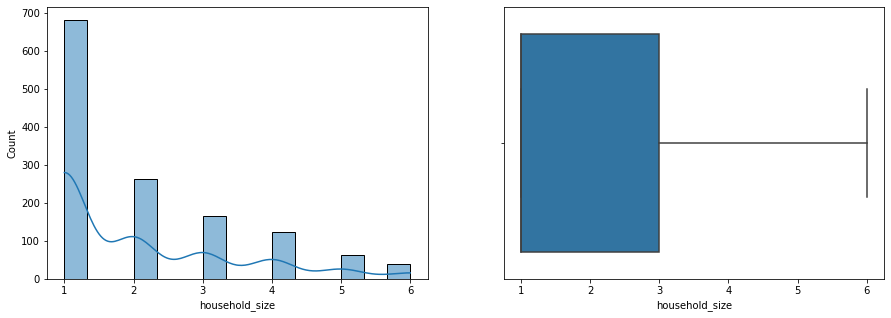

In [44]:
plot_var(clients, 'household_size')

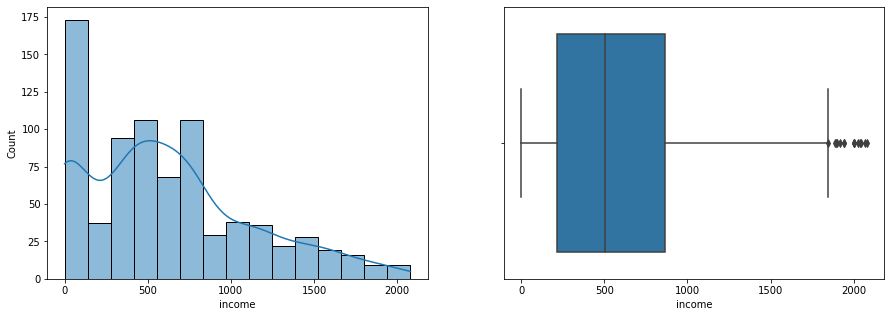

In [45]:
plot_var(clients, 'income')

### <u>Handling the missing values</u>

#### <u>Clients Data</u>

In [46]:
#Check columnwise missing values
clients.isnull().sum()

uid                 0
dob                 0
household_size     23
gender              1
race               24
ethnicity          25
veteran            26
type                0
income            567
health_ins        142
disabling_cond     59
dtype: int64

In [47]:
#imputing the missing values of the 'income' column by the mean
clients['income'] = clients['income'].fillna(clients['income'].mean())

In [48]:
#Since it is a categorical column with 3 classes and only 1 missing values, we'll imput it with mode.
clients['gender'] = clients['gender'].replace(np.nan, 'Male')

In [49]:
#Fill up categorical features with mode values
clients['health_ins'] = clients['health_ins'].fillna(clients["health_ins"].mode()[0])
clients['disabling_cond'] = clients['disabling_cond'].fillna(clients["disabling_cond"].mode()[0])
clients['veteran'] = clients['veteran'].fillna(clients["veteran"].mode()[0])
clients['ethnicity'] = clients['ethnicity'].fillna(clients["ethnicity"].mode()[0])
clients['race'] = clients['race'].fillna(clients["race"].mode()[0])
clients['gender'] = clients['gender'].fillna(clients["gender"].mode()[0])

In [50]:
#replacing missing values with the most common class.
clients['household_size'] = clients['household_size'].fillna(clients['household_size'].mode()[0])

In [51]:
#Check columnwise missing values
clients.isnull().sum()

uid               0
dob               0
household_size    0
gender            0
race              0
ethnicity         0
veteran           0
type              0
income            0
health_ins        0
disabling_cond    0
dtype: int64

#### <u>Stays Data</u>

In [52]:
stays['end'].isnull()

0       False
1       False
2       False
3        True
4       False
        ...  
1805     True
1806    False
1807    False
1808    False
1809     True
Name: end, Length: 1810, dtype: bool

For **'end'** dates missing values in **'end'** column, we'll replace missing values with current date, as it shows that
client still stays in shelter

In [53]:
#Replace the missing values with today time
stays['end'] = stays['end'].replace(np.nan, pd.to_datetime('today').date())

In [54]:
#Check for missing values
stays.isnull().sum()

uid        0
shelter    0
start      0
end        0
dtype: int64

# <u>The Answer of 10 Questions</u>

###  How many unique families and individuals are in the clients table?

In [55]:
# Unique Families
clients.loc[clients['type'] == "Family"]["uid"].value_counts()

472efb12    2
1e886c92    2
078698f6    2
5188381d    2
fefb8b7d    2
           ..
f40373da    1
a1a7e1e0    1
abd1de63    1
b0fa07be    1
e9b7d9de    1
Name: uid, Length: 659, dtype: int64

In [56]:
# Unique Individuals
clients.loc[clients['type'] == "Individual"]["uid"].value_counts()

ebe242a2    3
3ac7777b    2
d7f82b62    2
a3655d5f    2
b6c37c49    2
           ..
f29f6e5b    1
e411cc94    1
5a84fb4f    1
4e67821a    1
10ae6a48    1
Name: uid, Length: 665, dtype: int64

__Inference:__ We can observe from the above results that we have **665 unique Individual clients** and **659 unique family type clients** in our records.

###  Statistical Test for difference in age, gender, ethnicity, veteran status, income, health insurance and disabling condition

We need to perform different statistical test for each variable **age**, **gender**, **ethnicity**, **veteran status**, **income**, **health status** and **disabling condition** with **type** of family. For comparing with cateogircal variable like gender or ethnicity, we'll be implementing **chi-squared test** while for comparing numerical variable like, age, we'll be implementing **t-test**.

### <u>Type vs age</u>

In [57]:
# Compute age from date variable
from datetime import datetime, date


# Subtract today's date from date of birth for each client to get age
clients["age"] = (pd.to_datetime('today').year - pd.to_datetime(clients["dob"]).dt.year)
clients["age"]

0       72
1       62
2       35
3       55
4       39
        ..
1352    31
1353    22
1354    48
1355    24
1356    26
Name: age, Length: 1357, dtype: int64

__Null Hypothesis:__ The age of clients do not vary significantly in different family types (singles/families) at 95% confidence Interval.<br>
__Alternative Hypothesis:__ The age of clients varies significantly in different family types (singles/families) at 95% confidence Interval.

For checking the significance at 95% CI, we'll reject null hypothesis if p-value would be less than 0.05.

In [58]:
from scipy.stats import ttest_ind
import numpy as np


# Seperate the family/individual clients to compare thier ages
family = clients.loc[clients['type']=="Family"]["age"]
individual = clients.loc[clients['type']=="Individual"]["age"]


#Student’s t-test is very good when the data follows normal distribution
_,pval = ttest_ind(family,individual,equal_var=False) 
print('p-value',pval)

if pval <0.05:
  print("We reject null hypothesis")
else:
  print("We fail to reject null hypothesis")

p-value 6.637484576005685e-142
We reject null hypothesis


__Inference:__ Our Alternative hypthesis stands True, The age of clients varies significantly in different family types (singles/families) at 95% confidence Interval

### <u>Type vs Gender</u>

In [59]:
from scipy.stats import chi2_contingency

contigency= pd.crosstab(clients['type'], clients['gender'])
display(contigency)
c, p, dof, expected = chi2_contingency(contigency)


# interpret p-value
alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (H0 holds true)')

gender,Female,Male,Other
type,,,
Family,614,60,2
Individual,7,673,1


p value is 5.915558715899874e-241
Dependent (reject H0)


### <u>Type vs ethnicity</u>

In [60]:
from scipy.stats import chi2_contingency

contigency= pd.crosstab(clients['type'], clients['ethnicity'])
display(contigency)
c, p, dof, expected = chi2_contingency(contigency)


# interpret p-value
alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (H0 holds true. we fail to reject the null hypothesis)')

ethnicity,Hispanic/Latino,Non-Hispanic/Non-Latino
type,,
Family,33,643
Individual,32,649


p value is 0.975712577549807
Independent (H0 holds true. we fail to reject the null hypothesis)


### <u>Type vs veteran status</u>

In [61]:
from scipy.stats import chi2_contingency

contigency= pd.crosstab(clients['type'], clients['veteran'])
display(contigency)
c, p, dof, expected = chi2_contingency(contigency)


# interpret p-value
alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (H0 holds true)')

veteran,No,Yes
type,,
Family,672,4
Individual,620,61


p value is 1.359373625921589e-12
Dependent (reject H0)


### <u>Type vs Health Insurance</u>

In [62]:
from scipy.stats import chi2_contingency

contigency= pd.crosstab(clients['type'], clients['health_ins'])
display(contigency)
c, p, dof, expected = chi2_contingency(contigency)


# interpret p-value
alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (H0 holds true)')

health_ins,No,Yes
type,,
Family,53,623
Individual,211,470


p value is 1.0184458007756283e-26
Dependent (reject H0)


### <u>Type vs Disabling Condition</u>

In [63]:
from scipy.stats import chi2_contingency

contigency= pd.crosstab(clients['type'], clients['disabling_cond'])
display(contigency)
c, p, dof, expected = chi2_contingency(contigency)


# interpret p-value
alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (H0 holds true)')

disabling_cond,No,Yes
type,,
Family,416,260
Individual,403,278


p value is 0.40460910356008684
Independent (H0 holds true)


In [64]:
stays = pd.read_csv("Stays.csv")

In [65]:
stays.head()

,uid,shelter,start,end
0,1726b464,Singles Shelter B,2015-12-18,2016-04-08
1,0b8fce0c,Singles Shelter A,2015-10-29,2015-11-20
2,147dbf1e,Family Shelter G,2018-12-10,2019-07-08
3,4dea1ce3,Family Shelter H,2019-07-19,NaN
4,a94d5af3,Family Shelter C,2017-08-17,2018-07-20


In [66]:
# How many stay records are in shelter stays available?
stays.uid.value_counts()

0e8c1d46    10
43e2a2e9     8
4d17d36c     7
99f00958     7
0ddc9e32     7
            ..
8fc50aa7     1
3138fe4a     1
5b6ff334     1
2900f8c4     1
1cfd58a6     1
Name: uid, Length: 1324, dtype: int64

###  Pivot table to compare age groups

Create a pivot table that shows a breakdown of race by clients grouped into two age categories (as of today): clients 65 and clients below 65 

In [67]:
clients['Age-group']=["Below 65" if x<65 else "Above 65" for x in clients['age']]

In [68]:
clients['Age-group']

0       Above 65
1       Below 65
2       Below 65
3       Below 65
4       Below 65
          ...   
1352    Below 65
1353    Below 65
1354    Below 65
1355    Below 65
1356    Below 65
Name: Age-group, Length: 1357, dtype: object

In [69]:
pivot = pd.pivot_table(clients, values='uid', index='race', columns='Age-group',
                          aggfunc='count')

In [70]:
pivot

Age-group,Above 65,Below 65
race,,
American Indian,1,7
Asian,1,4
Black,144,1110
Multiracial/Other,4,23
White,15,48


### Conduct a statistical test to determine whether differences in length of stay by shelter type (family/singles) are significant.

In [71]:
# Compute length of stays
stays['end'] = stays['end'].replace(np.nan, pd.to_datetime('today').date())


stays['end'] = pd.to_datetime(stays['end'])
stays['start'] = pd.to_datetime(stays['start'])

# date['end'] = date['inputDate'].dt.day_name()
stays['length_of_stays'] = (stays['end'] - stays['start']).dt.days
stays['length_of_stays']

0        112
1         22
2        210
3       1237
4        337
        ... 
1805    1380
1806       1
1807       2
1808      71
1809    1297
Name: length_of_stays, Length: 1810, dtype: int64

__Null Hypothesis:__ The type of family (single/family) do not have significant impact on length of stays in shelter at 95% confidence interval. <br>
__Alternative Hypothesis:__  The type of family (single/family) have significant impact on length of stays in shelter at 95% confidence interval. 

For checking the significance at 95% CI, we'll reject null hypothesis if p-value would be less than 0.05.

In [72]:
from scipy.stats import ttest_ind
import numpy as np

singles = ['Singles Shelter B', 'Singles Shelter A', 'Singles Shelter D', 'Singles Shelter C', ]
families = ['Family Shelter G',
       'Family Shelter H', 'Family Shelter C', 'Family Shelter A',
       'Family Shelter B', 'Family Shelter F', 'Family Shelter D', 'Family Shelter I']


Score_1 = stays.loc[stays['shelter'].isin(singles)]["length_of_stays"]
Score_2 = stays.loc[stays['shelter'].isin(families)]["length_of_stays"]


#Student’s t-test is very good when the data follows normal distribution
_,pval = ttest_ind(Score_1,Score_2,equal_var=False) 
print('p-value',pval)

if pval <0.05:
  print("We reject null hypothesis")
else:
  print("We fail to reject null hypothesis")

p-value 1.629740763520637e-88
We reject null hypothesis


__Inference:__ The type of family (single/family) varies significantly with length of stays in shelter at 95% confidence interval.

###  Create a chart with columns uid, dob and household size from the Clients table joined to shelter column from the Stays table (the result should have four columns).

In [73]:
#Inner merge both dataframes with required columns only
clients[["uid", "dob", "household_size"]].merge(stays[["uid", "shelter"]], how='inner', on='uid')

,uid,dob,household_size,shelter
0,1726b464,1950-03-14,1.0,Singles Shelter B
1,0b8fce0c,1960-03-03,1.0,Singles Shelter A
2,147dbf1e,1987-06-01,4.0,Family Shelter G
3,4dea1ce3,1967-01-06,5.0,Family Shelter H
4,a94d5af3,1983-11-18,6.0,Family Shelter C
...,...,...,...,...
1893,e96e03cf,2000-06-12,2.0,Family Shelter H
1894,fecfec0b,1974-05-13,1.0,Singles Shelter B
1895,fecfec0b,1974-05-13,1.0,Singles Shelter A
1896,00a24e0e,1998-07-08,2.0,Family Shelter H


### 6. Write a SQL statement creating the chart above.

In [74]:
! pip install -U pandasql

Requirement already up-to-date: pandasql in /Applications/anaconda3/lib/python3.8/site-packages (0.7.3)


In [75]:
import pandasql as ps
# SQL query over pandas dataframe
ps.sqldf("SELECT * FROM clients INNER JOIN stays ON stays.uid = clients.uid")[["uid", "dob", "household_size", "shelter"]]


,uid,uid,dob,household_size,shelter
0,1726b464,1726b464,1950-03-14 00:00:00.000000,1.0,Singles Shelter B
1,0b8fce0c,0b8fce0c,1960-03-03 00:00:00.000000,1.0,Singles Shelter A
2,147dbf1e,147dbf1e,1987-06-01 00:00:00.000000,4.0,Family Shelter G
3,4dea1ce3,4dea1ce3,1967-01-06 00:00:00.000000,5.0,Family Shelter H
4,a94d5af3,a94d5af3,1983-11-18 00:00:00.000000,6.0,Family Shelter C
...,...,...,...,...,...
1893,e96e03cf,e96e03cf,2000-06-12 00:00:00.000000,2.0,Family Shelter H
1894,fecfec0b,fecfec0b,1974-05-13 00:00:00.000000,1.0,Singles Shelter A
1895,fecfec0b,fecfec0b,1974-05-13 00:00:00.000000,1.0,Singles Shelter B
1896,00a24e0e,00a24e0e,1998-07-08 00:00:00.000000,2.0,Family Shelter H


### Conduct statistical tests to determine whether the aggregate length of stay - the sum total of all client lengths of stay - is dependent upon income, age, or gender. Describe your results. Visualize the results of your findings.

We need to determine whether there are any differences between independent variables like income, age or gender continuous dependent variable.

In [76]:
from statsmodels.multivariate.manova import MANOVA

merged = clients.merge(stays, how='inner', on='uid')

fit = MANOVA.from_formula('income + age + gender ~ length_of_stays', data=merged)
print(fit.mv_test())

                                 Multivariate linear model
                                                                                            
--------------------------------------------------------------------------------------------
       Intercept               Value         Num DF   Den DF          F Value         Pr > F
--------------------------------------------------------------------------------------------
          Wilks' lambda               0.0000 5.0000 1892.0000 340832419799398784.0000 0.0000
         Pillai's trace               1.0000 5.0000 1892.0000 340832419799398784.0000 0.0000
 Hotelling-Lawley trace 900719925474098.2500 5.0000 1892.0000 340832419799398784.0000 0.0000
    Roy's greatest root 900719925474098.2500 5.0000 1892.0000 340832419799398784.0000 0.0000
--------------------------------------------------------------------------------------------
                                                                                            
-----------

__Inference:__ We can observe from teh above results that p-value for different are less than 0.05 for each test, depicting that all three variables income, gender and age have significant impact on length of stay in shelter.

### Choose three variable from the Clients table. Which of the three best predicts the length of any one stay in the shelter

In [77]:
shelter_df = merged[["age", "income", "household_size", "length_of_stays"]]

In [78]:
X = shelter_df.drop(["length_of_stays"], axis = 1)
y = shelter_df["length_of_stays"]
X = X.fillna(X.mean())

In [79]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=0.2, random_state=0)

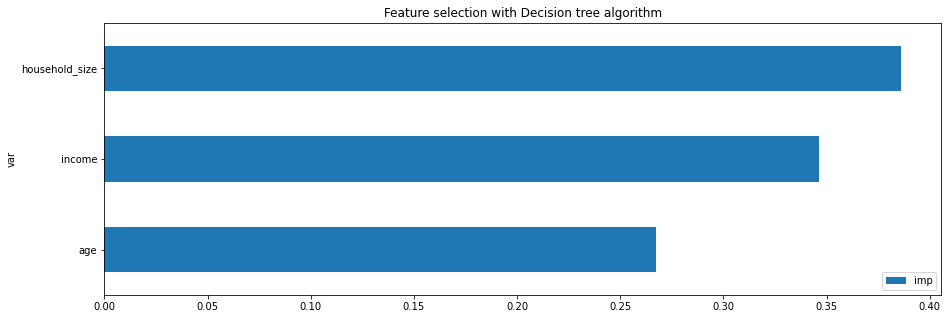

In [80]:
from sklearn.ensemble import RandomForestRegressor
from matplotlib import rcParams

rcParams['figure.figsize'] = 15, 5
def features_selection(X, y):

    model = RandomForestRegressor()
    model.fit(X,y)
    
    # summarize feature importance
    imp = pd.DataFrame()

    imp["var"] = X.columns

    importance = model.feature_importances_

    imp["imp"] = importance

    imp = imp.sort_values("imp", ascending = False).reset_index(drop = True).loc[0:14]


    # PRINT OUT THE DATA FRAME
    table = imp.sort_values(by = 'imp', ascending = True)

    selected_features_tree =  list(table['var'])
    X = X[selected_features_tree]

    table.plot.barh(x='var', y='imp')

    plt.title("Feature selection with Decision tree algorithm")
    plt.show()
    return X

X1 = features_selection(X, y)

### SHAP - SHapley Additive exPlanations

"The goal of SHAP is to explain the prediction of an instance x by computing the contribution of each feature to the prediction. The SHAP explanation method computes Shapley values from coalitional game theory. The feature values of a data instance act as players in a coalition. Shapley values tell us how to fairly distribute the "payout" (= the prediction) among the features."

In [81]:
df_shelter = merged[["age", "income", "household_size", "length_of_stays"]]

In [82]:
X = df_shelter.drop(["length_of_stays"], axis = 1)
y = df_shelter["length_of_stays"]

In [83]:
import shap
from catboost import CatBoostRegressor, Pool

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)


params = {'iterations':5000, #The maximum number of trees that can be built when solving machine learning problems.
        'learning_rate':0.001, #Used for reducing the gradient step.
        'depth':3,            #Depth of the tree.
        'loss_function':'RMSE', #The metric to use in training.
        'eval_metric':'RMSE',#The metric used for overfitting detection(if enabled) and best model selection(if enabled)
        'random_seed':55,   #The random seed used for training.
        #'cat_features':,
        'metric_period':200,  #The usage of this parameter speeds up the training.
        'od_type':"Iter",  # overfit detector
        'od_wait':20,  # most recent best iteration to wait before stopping
        'verbose':True, #True corresponds to the Verbose logging level
        'use_best_model':True}#If this parameter is set, the number of trees that are saved in the resulting model is defined.


In [84]:
model_regressor = CatBoostRegressor(**params)

model_regressor.fit(X_train, y_train, 
          eval_set=(X_test, y_test),  
          use_best_model=True, # True if we don't want to save trees created after iteration with the best validation score
          plot= True   
         );

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 462.5854022	test: 465.2357495	best: 465.2357495 (0)	total: 67ms	remaining: 5m 35s
200:	learn: 441.7565860	test: 443.6972120	best: 443.6972120 (200)	total: 143ms	remaining: 3.4s
400:	learn: 426.9224631	test: 428.1156010	best: 428.1156010 (400)	total: 219ms	remaining: 2.51s
600:	learn: 416.4184786	test: 416.7968522	best: 416.7968522 (600)	total: 302ms	remaining: 2.21s
800:	learn: 408.8503067	test: 408.6590146	best: 408.6590146 (800)	total: 373ms	remaining: 1.96s
1000:	learn: 403.3819436	test: 402.7514112	best: 402.7514112 (1000)	total: 457ms	remaining: 1.83s
1200:	learn: 399.3664422	test: 398.3981419	best: 398.3981419 (1200)	total: 546ms	remaining: 1.73s
1400:	learn: 396.3879192	test: 395.2820534	best: 395.2820534 (1400)	total: 617ms	remaining: 1.58s
1600:	learn: 394.0864860	test: 393.0346135	best: 393.0346135 (1600)	total: 717ms	remaining: 1.52s
1800:	learn: 392.2760887	test: 391.3364354	best: 391.3364354 (1800)	total: 1.02s	remaining: 1.81s
2000:	learn: 390.7706661	test: 389.

In [85]:
shap_values = model_regressor.get_feature_importance(Pool(X_test, label=y_test) , type="ShapValues")
 
expected_value = shap_values[0,-1]
shap_values = shap_values[:,:-1]

shap.initjs()
shap.force_plot(expected_value, shap_values[0,:], X_test.iloc[0,:])

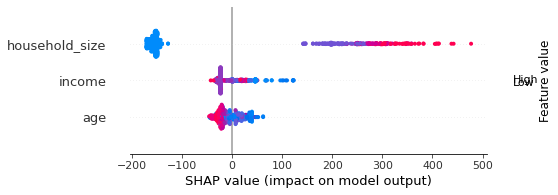

In [86]:
shap.summary_plot(shap_values, X_test)

__Infernce:__ The above feature importance plots show both that **household size** is the most significant variable to predict the lenght of stay in shelters for differnet clients. While, random forest algorithm shows that **age** has lowest importance in estimating the length of stay between these three variables.

## <u>Bonus Question</u>

Suppose the Department of Human Services enacted a policy to provide clients in shelter with low incomes a wage supplement of $200 per month. The goal of this new policy is to reduce the total time a client may experience homelessness. You have been asked to determine whether the new policy has a detectable impact of clients’ length of stay in shelter. Please explain what approach you plan to take for your analysis

**To separate the lower income clients, we'll need to set a lower wage threshold. To confirm this, we'll look at our data to see when each client first stayed in a shelter. This way, we'll be able to see which specific clients remained out of shelter during the entire period, and we'll be able to design the policy accordingly**

## References:

* https://skipperkongen.dk/2018/11/26/how-to-fill-missing-dates-in-pandas/
* https://stackoverflow.com/questions/42789324/how-to-pandas-fillna-with-mode-of-column
* https://www.pythonfordatascience.org/independent-samples-t-test-python/
* https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html
* https://www.geeksforgeeks.org/python-pearsons-chi-square-test/
* https://hersanyagci.medium.com/detecting-and-handling-outliers-with-pandas-7adbfcd5cad8
* https://christophm.github.io/interpretable-ml-book/shap.html
* https://towardsdatascience.com/why-1-5-in-iqr-method-of-outlier-detection-5d07fdc82097